## `MotionSense Dataset`

### **Índice do documento**

1. [Introdução](#1.-Introdução)
   
    1.1 [xx](#1.1-Metodologia-adotada)
    
    
2. [Compreensão do Dados](#2.-Compreensão-dos-Dados)

    2.1 [Carregamento das Bibliotecas Base](#2.1-Carregamento-das-Bibliotecas-Base)
    
    2.2 [Carregamento e Análise do *Dataset*](#2.2-Carregamento-e-Análise-do-*Dataset*)

    2.3 [Visualização do *Dataset*](#2.3-Visualização-do-*Dataset*)
   
    2.3.1 [Gráfico de Barras da Quantidade de *Reviews* por Sentimento](#2.3.1-Gráfico-de-Barras-da-Quantidade-de-*Reviews*-por-Sentimento)

    2.3.2 [Histogramas da Frequência do Comprimento das *Reviews* Positivas e Negativas](#2.3.2-Histogramas-da-Frequência-do-Comprimento-das-*Reviews*-Positivas-e-Negativas)

    2.3.3 [Word Cloud das *Reviews*](#2.3.3-Word-Cloud-das-*Reviews*)


# **1. Introdução**

[Voltar ao ínicio](#Índice-do-documento)

# **2. Compreensão dos Dados**

## **2.1 Carregamento das Bibliotecas Base**

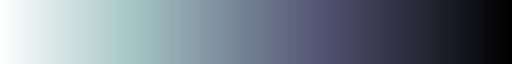

In [4]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
sns.color_palette("bone_r", as_cmap=True)

## **2.2 Carregamento e Análise do Dataset**

+ Definição dos Caminhos

In [22]:
# Caminhos absolutos dos arquivos
subject_data_file = r'C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\APROF\\mei-approf\\RNN\\RNN_dataset\\data_subjects_info.csv'
data_dir = r'C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\RNN_dataset\\A_DeviceMotion_data'

# Verificar se os diretórios e arquivos existem
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"O diretório {data_dir} não foi encontrado.")

if not os.path.exists(subject_data_file):
    raise FileNotFoundError(f"O arquivo {subject_data_file} não foi encontrado.")

+ Mudança de Diretório

In [23]:
os.chdir(data_dir)
os.chdir(os.pardir)

+ Função para Obter Todos os Caminhos dos Arquivos do Conjunto de Dados

`get_all_dataset_paths`: Percorre recursivamente todos os subdiretórios em input_dir e recolhe os caminhos de todos os arquivos CSV encontrados.

In [24]:
def get_all_dataset_paths(input_dir) -> []:
    input_files = []
    for dirs, subdirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.csv'):
                dir_name = os.path.basename(dirs)
                if dir_name.startswith(('dws', 'ups', 'sit')):
                    input_files.append(os.path.join(dirs, file))
    return input_files

+ Função para Carregar os Dados e Combinar com Metadados

`load_whole_dataframe_from_paths`: Carrega cada arquivo CSV listado em paths, adiciona colunas de metadados (subject_id, session_id, category, age, gender, height, weight) e concatena todos os dados em um único DataFrame.

In [27]:
def load_whole_dataframe_from_paths(paths, meta) -> pd.DataFrame:
    
    df = pd.DataFrame()

    for p in paths:
        c_dir, c_file = p.split('\\')[-2], p.split('\\')[-1]
        c_cat, c_ses = c_dir.split('_')[-2], c_dir.split('_')[-1]
        c_sub = c_file.split('_')[-1].split('.')[-2]
        
        tdf = pd.read_csv(p, encoding = "utf-8")
        tdf = tdf.assign(subject_id = int(c_sub))
        tdf = tdf.assign(session_id = int(c_ses))
        tdf = tdf.assign(category = str(c_cat))
        tdf = tdf.assign(age = int(meta.age[int(c_sub) - 1]))
        tdf = tdf.assign(gender = int(meta.gender[int(c_sub) - 1]))
        tdf = tdf.assign(height = int(meta.height[int(c_sub) - 1]))
        tdf = tdf.assign(weight = int(meta.weight[int(c_sub) - 1]))

        df = pd.concat([df, tdf])
    
    df.reset_index(drop=True, inplace=True)
    return df

+ Carregar os Metadados e Todos os Caminhos dos Arquivos do Conjunto de Dados

`subject_data_frame`: Carrega os metadados dos sujeitos a partir do arquivo CSV.

`all_dataset_paths`: Obtém todos os caminhos dos arquivos CSV no diretório de dados.

`data_frame`: Carrega e combina todos os dados dos arquivos CSV com os metadados.

In [28]:
subject_data_frame = pd.DataFrame(pd.read_csv(subject_data_file, encoding = "utf-8"))
all_dataset_paths = get_all_dataset_paths(data_dir)
data_frame = load_whole_dataframe_from_paths(all_dataset_paths, subject_data_frame)

In [30]:
data_frame.head(5)

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject_id,session_id,category,age,gender,height,weight
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,1,dws,46,1,188,102
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,1,dws,46,1,188,102
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,1,dws,46,1,188,102
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,1,dws,46,1,188,102
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,1,dws,46,1,188,102
